# Bootstrapping in Python

In [121]:
import numpy as np
import dask.array as da
import pandas as pd
import sqlalchemy as db
from sqlalchemy import create_engine
import sqlite3
import pandas as pd
import seaborn as sns

import numpy as np
import pandas as pd
from statsmodels.stats.power import NormalIndPower, TTestIndPower
from scipy.stats import ttest_ind_from_stats
import numpy as np
import scipy


In [123]:
df = pd.read_csv('df_panel_fix.csv')

In [124]:
df_subset = df[["year", "reg", "province", "gdp", "fdi", 'it',"specific"]]
df_subset.columns = ["year", "region", "province", "gdp", "fdi", 'it',"specific"]

In [125]:
df=df_subset
df

,year,region,province,gdp,fdi,it,specific
0,1996,East China,Anhui,2093.30,50661,631930,147002.0
1,1997,East China,Anhui,2347.32,43443,657860,151981.0
2,1998,East China,Anhui,2542.96,27673,889463,174930.0
3,1999,East China,Anhui,2712.34,26131,1227364,285324.0
4,2000,East China,Anhui,2902.09,31847,1499110,195580.0
...,...,...,...,...,...,...,...
355,2003,East China,Zhejiang,9705.02,498055,2261631,391292.0
356,2004,East China,Zhejiang,11648.70,668128,3162299,656175.0
357,2005,East China,Zhejiang,13417.68,772000,2370200,656175.0
358,2006,East China,Zhejiang,15718.47,888935,2553268,1017303.0


East China
gdp
East China
fdi
East China
it
North China
gdp
North China
fdi
North China
it


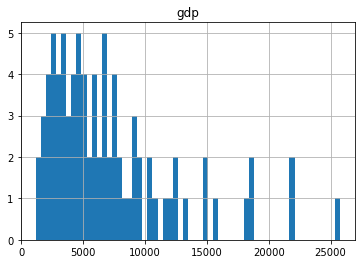

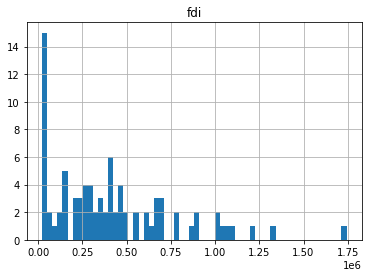

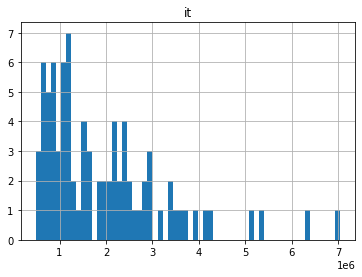

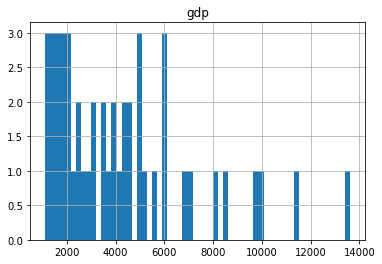

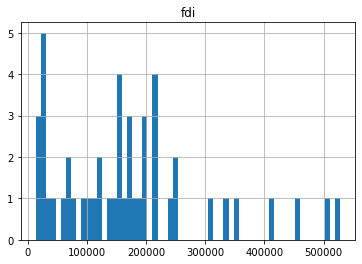

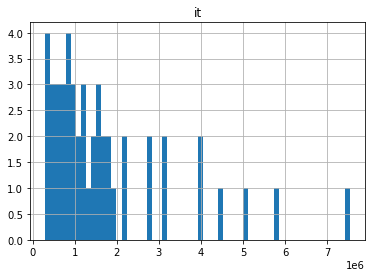

In [127]:
# Add distributions by region
import matplotlib.pyplot as plt
#fig, axes = plt.subplots(nrows=3, ncols=3)

test_cells = ['East China', 'North China']
metrics = ['gdp', 'fdi', 'it']

for test_cell in test_cells:
    for metric in metrics:
        df.loc[df["region"] == test_cell].hist(column=[metric], bins=60)
        print(test_cell)
        print(metric)

array([[<AxesSubplot:title={'center':'fdi'}>]], dtype=object)

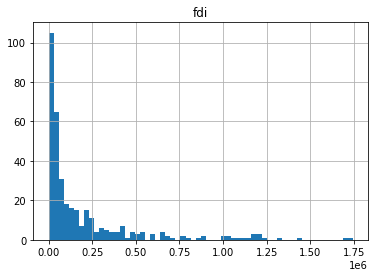

In [128]:
df.hist(column=['fdi'], bins=60)

## Distributions of Dependant Variables

### Right skew

array([[<AxesSubplot:title={'center':'fdi'}>]], dtype=object)

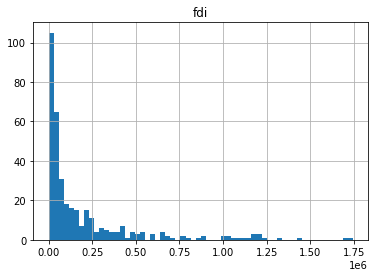

In [143]:
df.hist(column=['fdi'], bins=60)

<AxesSubplot:xlabel='fdi', ylabel='Count'>

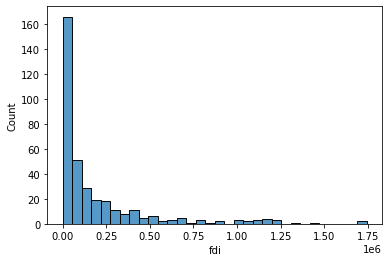

In [142]:
sns.histplot(df['fdi'])

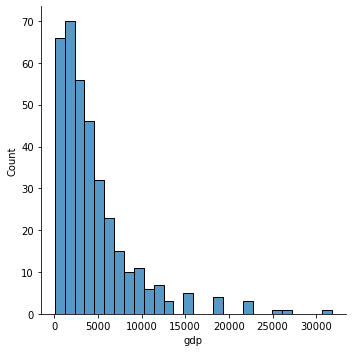

In [133]:
sns.displot(df['gdp'])

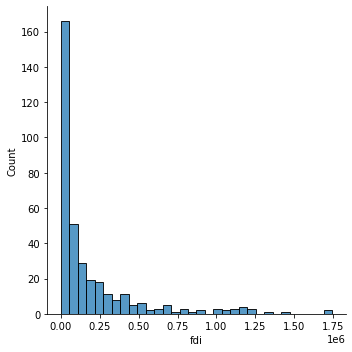

In [138]:
sns.displot(df['fdi'])

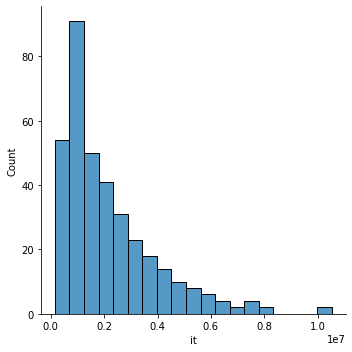

In [139]:
sns.displot(df['it'])

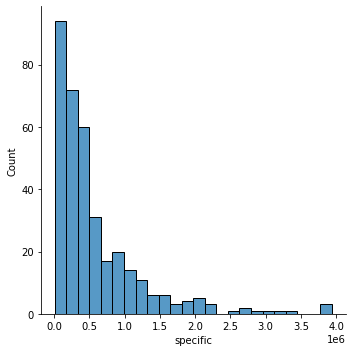

In [140]:
sns.displot(df['specific'].dropna())

array([[<AxesSubplot:title={'center':'fdi'}>]], dtype=object)

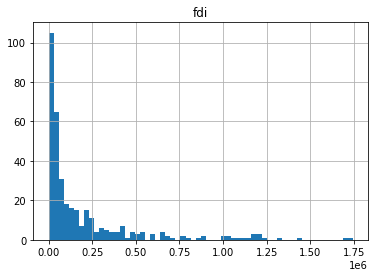

In [141]:
df.hist(column=['fdi'], bins=60)

## Removal of GDP value outliers more than 3 standard deviations away from the mean

## outlier removal of rows with GDP values that are > 3 standard deviations away form the mean

In [144]:
import scipy.stats as stats

In [145]:
df['gdp_zscore'] = stats.zscore(df['gdp'])

## these are the observations more then > 3 SDs away from the mean of gdp that will be dropped

array([[<AxesSubplot:title={'center':'gdp'}>]], dtype=object)

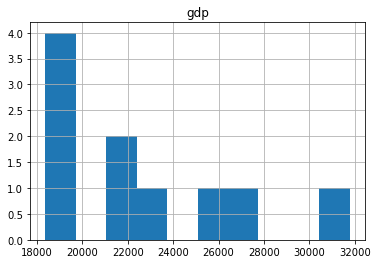

In [146]:
df[abs(df['gdp_zscore'])>3].hist(column = ['gdp'])

In [147]:
df_no_gdp_outliers=df[abs(df['gdp_zscore'])<3]

In [148]:
df_no_gdp_outliers

,year,region,province,gdp,fdi,it,specific,gdp_zscore
0,1996,East China,Anhui,2093.30,50661,631930,147002.0,-0.521466
1,1997,East China,Anhui,2347.32,43443,657860,151981.0,-0.464746
2,1998,East China,Anhui,2542.96,27673,889463,174930.0,-0.421061
3,1999,East China,Anhui,2712.34,26131,1227364,285324.0,-0.383239
4,2000,East China,Anhui,2902.09,31847,1499110,195580.0,-0.340870
...,...,...,...,...,...,...,...,...
354,2002,East China,Zhejiang,8003.67,307610,1962633,365437.0,0.798274
355,2003,East China,Zhejiang,9705.02,498055,2261631,391292.0,1.178172
356,2004,East China,Zhejiang,11648.70,668128,3162299,656175.0,1.612181
357,2005,East China,Zhejiang,13417.68,772000,2370200,656175.0,2.007180


array([[<AxesSubplot:title={'center':'gdp'}>]], dtype=object)

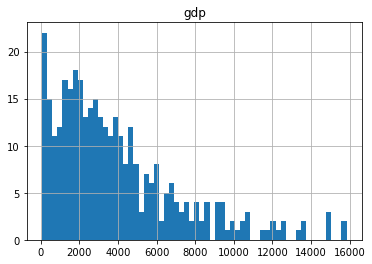

In [149]:
df_no_gdp_outliers.hist(column=['gdp'], bins=60)

In [150]:
counts_fiscal=df.groupby('region').count()
counts_fiscal

,year,province,gdp,fdi,it,specific,gdp_zscore
region,,,,,,,
East China,84,84,84,84,84,84,84
North China,48,48,48,48,48,47,48
Northeast China,36,36,36,36,36,36,36
Northwest China,60,60,60,60,60,60,60
South Central China,72,72,72,72,72,72,72
Southwest China,60,60,60,60,60,57,60


In [151]:
counts_fiscal=df.groupby('province').count()
counts_fiscal

,year,region,gdp,fdi,it,specific,gdp_zscore
province,,,,,,,
Anhui,12,12,12,12,12,12,12
Beijing,12,12,12,12,12,12,12
Chongqing,12,12,12,12,12,9,12
Fujian,12,12,12,12,12,12,12
Gansu,12,12,12,12,12,12,12
Guangdong,12,12,12,12,12,12,12
Guangxi,12,12,12,12,12,12,12
Guizhou,12,12,12,12,12,12,12
Hainan,12,12,12,12,12,12,12


In [152]:
#df_no_gdp_outliers.pivot_table(index='grouping column 1', columns='grouping column 2', values='aggregating column', aggfunc='sum')

In [153]:
#pd.crosstab(df_no_gdp_outliers, 'year')

In [154]:
df_no_gdp_outliers_subset = df_no_gdp_outliers[['region', 'gdp', 'fdi', 'it']]
df_no_gdp_outliers_subset

,region,gdp,fdi,it
0,East China,2093.30,50661,631930
1,East China,2347.32,43443,657860
2,East China,2542.96,27673,889463
3,East China,2712.34,26131,1227364
4,East China,2902.09,31847,1499110
...,...,...,...,...
354,East China,8003.67,307610,1962633
355,East China,9705.02,498055,2261631
356,East China,11648.70,668128,3162299
357,East China,13417.68,772000,2370200


In [183]:
def aggregate_and_ttest(dataset, groupby_feature='province', alpha=.05, test_cells = [0, 1]):
    #Imports
    from tqdm import tqdm
    from scipy.stats import ttest_ind_from_stats

    
    metrics = ['gdp', 'fdi', 'it']
    
    feature_size = 'size'
    feature_mean = 'mean'
    feature_std = 'std'    

    for metric in tqdm(metrics):
        
        #print(metric)
        crosstab = dataset.groupby(groupby_feature, as_index=False)[metric].agg(['size', 'mean', 'std'])
        print(crosstab)
        
        treatment = crosstab.index[test_cells[0]]
        control = crosstab.index[test_cells[1]]
        
        counts_control = crosstab.loc[control, feature_size]
        counts_treatment = crosstab.loc[treatment, feature_size]

        mean_control = crosstab.loc[control, feature_mean]
        mean_treatment = crosstab.loc[treatment, feature_mean]

        standard_deviation_control = crosstab.loc[control, feature_std]
        standard_deviation_treatment = crosstab.loc[treatment, feature_std]
        
        t_statistic, p_value = ttest_ind_from_stats(mean1=mean_treatment, std1=standard_deviation_treatment, nobs1=counts_treatment,mean2=mean_control,std2=standard_deviation_control,nobs2=counts_control)
        
        #fstring to print the p value and t statistic
        print(f"The t statistic of the comparison of the treatment test cell of {treatment} compared to the control test cell of {control} for the metric of {metric} is {t_statistic} and the p value is {p_value}.")
        
        #f string to say of the comparison is significant at a given alpha level

        if p_value < alpha: 
            print(f'The comparison between {treatment} and {control} is statistically significant at the threshold of {alpha}') 
        else: 
            print(f'The comparison between {treatment} and {control} is not statistically significant at the threshold of {alpha}')

In [185]:
aggregate_and_ttest(df_no_gdp_outliers, test_cells = [0,2])

100%|██████████| 3/3 [00:00<00:00, 73.44it/s]

              size          mean          std
province                                     
Anhui           12   3905.870000  1657.186350
Beijing         12   4673.453333  2585.218431
Chongqing       12   2477.712500  1073.374101
Fujian          12   4864.023333  2065.665290
Gansu           12   1397.832500   628.751284
Guangdong        8  10564.827500  3076.928885
Guangxi         12   2924.104167  1316.680079
Guizhou         12   1422.010833   679.163186
Hainan          12    686.714167   277.167010
Hebei           12   6936.825000  3266.776349
Heilongjiang    12   4041.241667  1531.676708
Henan           12   7208.966667  3669.236184
Hubei           12   4772.503333  2121.833184
Hunan           12   4765.891667  2159.588877
Jiangsu         10   8880.142000  3069.858941
Jiangxi         12   2460.782500  1125.673920
Jilin           12   2274.854167   975.812431
Liaoning        12   5231.135000  1988.700441
Ningxia         12    432.268333   224.934621
Qinghai         12    383.099167  

In [161]:
EastvNorth=pd.DataFrame()
EastvNorth= aggregate_and_ttest(df_no_gdp_outliers_subset, test_cells = [0,1])
EastvNorth

100%|██████████| 3/3 [00:00<00:00, 138.11it/s]

                     size         mean          std
region                                             
East China             78  6070.604231  3500.372702
North China            48  4239.038542  2866.705149
Northeast China        36  3849.076944  1948.531835
Northwest China        60  1340.026167  1174.399739
South Central China    68  4835.540882  3697.129915
Southwest China        60  2410.398833  2144.589994
The t statistic of the comparison of the treatment test cell of East China compared to the control test cell of North China is 3.0488753833171947 and the p value is 0.0028085413359212334.
The comparison between East China and North China is statistically significant at the threshold of 0.05
                     size           mean            std
region                                                 
East China             78  355577.897436  275635.866746
North China            48  169600.583333  127011.475909
Northeast China        36  136623.750000  142734.495232
Northwest Ch

In [186]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats


test_1=df_no_gdp_outliers[df_no_gdp_outliers['province']=='Beijing']
test=test_1['gdp'].to_numpy()
test

control_1=df_no_gdp_outliers[df_no_gdp_outliers['province']=='Shanxi']
control=control_1['gdp'].to_numpy()
control

array([1292.11, 1476.  , 1611.08, 1667.1 , 1845.72, 2029.53, 2324.8 ,
       2855.23, 3571.37, 4230.53, 4878.61, 6024.45])

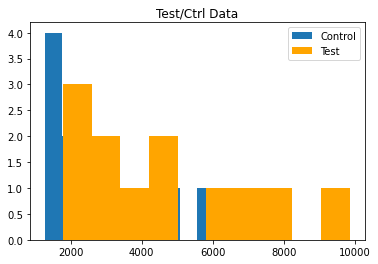

In [187]:
bins = np.linspace(0, 40, 20)

plt.hist(control, label='Control')
plt.hist(test, label='Test', color='orange')
plt.title('Test/Ctrl Data')
plt.legend()

In [188]:
bs.bootstrap_ab(test, control, stat_func=bs_stats.sum, compare_func=bs_compare.percent_change)

65.88937107712621    (-19.58634300490877, 124.01876332252021)

In [189]:
# run an a/b test simulation considering the lengths of the series (sum)
# consider the full 'volume' of values that are passed in

print(bs_compare.percent_change(test.sum(), control.sum()))

print(bs.bootstrap_ab(
    test, 
    control, 
    stat_func=bs_stats.sum,
    compare_func=bs_compare.percent_change
))

65.88937107712621
65.88937107712621    (-20.064956167313596, 124.54556877143521)


In [190]:
# run an a/b test simulation ignoring the lengths of the series (average)
# just what is the 'typical' value
# use percent change to compare test and control

print(bs_compare.difference(test.mean(), control.mean()))

1856.2424999999998


In [191]:
print(bs.bootstrap_ab(test, control, bs_stats.mean, bs_compare.difference))

1856.2424999999998    (218.25606250000146, 3411.9760624999994)
